In [30]:
import numpy as np
from matplotlib import pyplot as plt
# from context import weaklensclustersbi as wlcs

# Simulation
## Configuration

First, generate the sim_config file in the directory of interest

In [100]:
%run sim_config_example.py
with open('../simulations/example/sim_config.json', 'r') as f:
    sim_config = json.load(f)

Let's take a look at the example sim_config paramater values. For different numerical experiments, we'll tweak these, but this is a good representative example of what they could be.

In [101]:
print(json.dumps(sim_config, indent=2))

{
  "rm_relation": "murata17",
  "mc_relation": "child18",
  "num_parameter_samples": 10000,
  "sample_noise_dex": 0,
  "min_log10mass": 13,
  "max_log10mass": 15,
  "min_richness": 30,
  "max_richness": 40,
  "num_sims": 10,
  "drawn_noise_dex": 0,
  "num_radial_bins": 30,
  "sim_output_dir": "example"
}


## Generating Simulations

Now, we'll use this sim_config to generate our simulations. To do this, we'll use the `simulate_wl_profile.py` script and specify where in the `simulations` directory our `sim_dir` is.

In [102]:
%run simulate_wl_profile.py --sim_dir example

Let's take a look at what we generated. 

First, we simulated some mass-concentration pairs. To do this, we specify a log10mass range (`min_log10mass` and `max_log10mass`), a theoretical mass-concentration relation (`mc_relation`), a number of samples we want (`num_parameter_samples`), and some random normal noise applied on our relation (`sample_noise_dex`)

In [103]:
sample_mc_pairs = np.load('../simulations/example/sample_mc_pairs.npy')

(10000, 2)
[[14.99127908  4.89615066]
 [13.05450252  7.40539671]
 [13.36407692  6.89760799]
 [13.55847418  6.59802766]
 [14.72993836  5.12759895]]


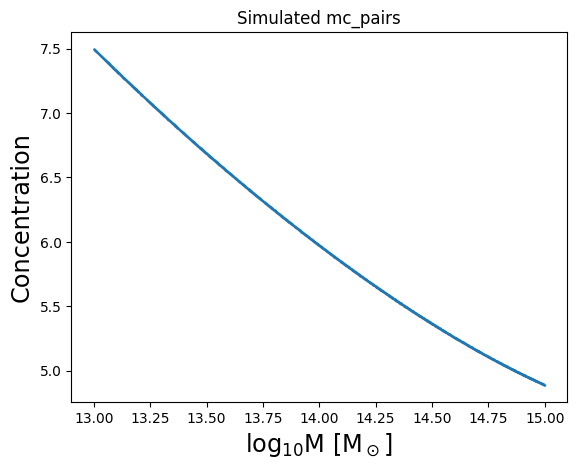

In [104]:
# (num_parameter_samples, 2)
print(np.shape(sample_mc_pairs))

# 5 example mc_pairs
print(sample_mc_pairs[:5])

# mc_pairs scatter plot
plt.scatter(sample_mc_pairs[:,0], sample_mc_pairs[:,1],s=0.2,alpha=0.2)
plt.xlabel('log$_{10}$M [M$_\odot$]', fontsize='xx-large')
plt.ylabel('Concentration', fontsize='xx-large')
plt.title('Simulated mc_pairs')
plt.show()

## Drawing Samples

The second thing we did in this script was to randomly draw some (`num_sims`) masses from a richness range (`min_richness` and `max_richness`), calculate their masses (using `rm_relation`, and generate some NFW profiles with `num_radial_bins` bins and some (`drawn_noise_dex`) noise added to these profiles. 

These will serve as our observables from which we'll (later in this notebook) try to infer the underlying log10mass and concentration.

In [106]:
drawn_mc_pairs = np.load('../simulations/example/drawn_mc_pairs.npy')
drawn_nfw_profiles = np.load('../simulations/example/drawn_nfw_profiles.npy')

First, let's look at the drawn_mc_pairs from the given richness bin

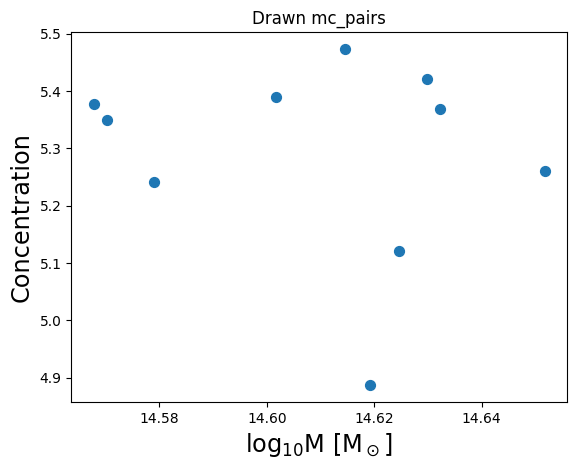

In [107]:
# drawn_mc_pairs scatter plot
plt.scatter(drawn_mc_pairs[:,0], drawn_mc_pairs[:,1],s=50)
plt.xlabel('log$_{10}$M [M$_\odot$]', fontsize='xx-large')
plt.ylabel('Concentration', fontsize='xx-large')
plt.title('Drawn mc_pairs')
plt.show()

Next, we can look at the drawn_nfw_profiles which we generated from the above drawn_mc_pairs.

In [108]:
# (num_sims, num_radial_bins)
print(np.shape(drawn_nfw_profiles))

(10, 30)


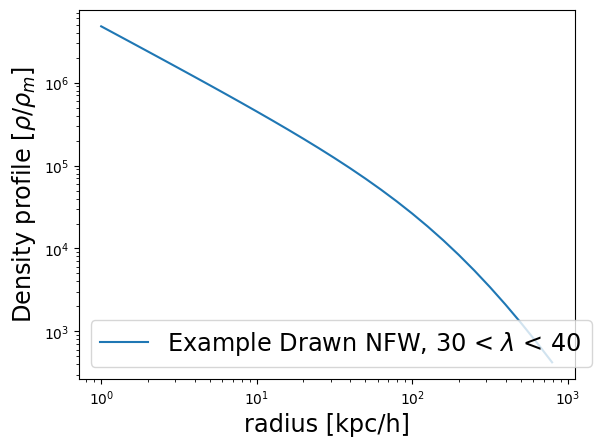

In [109]:
from colossus.cosmology import cosmology
cosmo = cosmology.setCosmology('planck18')

rbins = 10**np.arange(0, sim_config['num_radial_bins'] / 10, 0.1)
plt.figure()
plt.loglog()
plt.xlabel('radius [kpc/h]', fontsize='xx-large')
plt.ylabel('Density profile [$\\rho/\\rho_m$]', fontsize='xx-large')
plt.plot(rbins, drawn_nfw_profiles[0] / cosmo.rho_m(0), '-', label = f'Example Drawn NFW, {sim_config["min_richness"]} < $\lambda$ < {sim_config["max_richness"]}')
plt.legend(fontsize='xx-large');

# Inference
## Configuration

Similarly to what we did before, we'll generate an infer_config in our directory of interest and look at an example of what these values could be.

In [110]:
%run infer_config_example.py
with open('../configs/example/infer_config.json', 'r') as f:
    infer_config = json.load(f)

In [111]:
print(json.dumps(infer_config, indent=2))

{
  "inference_type": "sbi",
  "profile_noise_dex": 0.1,
  "config_dir": "example",
  "mc_pair_subselect": "all"
}


## MCMC

The first inference technique we use is Markov Chain Monte Carlo sampling. For both inference techniques, we'll need to specify:
* the sim_dir so we can read the output of the previous step (e.g. drawn_nfw_profiles) and
* the config_dir so we can read the infer_config and so we know where to save the output files

(Note: this is by far the most time intensive cell of the whole notebook)

In [112]:
%run mcmc_example.py --sim_dir example --config_dir example 

## burning in ... 


100%|████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 204.67it/s]


## running the full chain ... 


100%|██████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:09<00:00, 218.56it/s]


## burning in ... 


100%|████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 225.77it/s]


## running the full chain ... 


100%|██████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:09<00:00, 219.03it/s]


## burning in ... 


100%|████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 224.56it/s]


## running the full chain ... 


100%|██████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:09<00:00, 221.29it/s]


## burning in ... 


100%|████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 220.14it/s]


## running the full chain ... 


100%|██████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:09<00:00, 218.74it/s]


## burning in ... 


100%|████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 220.51it/s]


## running the full chain ... 


100%|██████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:09<00:00, 221.65it/s]


## burning in ... 


100%|████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 222.72it/s]


## running the full chain ... 


100%|██████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:09<00:00, 219.56it/s]


## burning in ... 


100%|████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 223.30it/s]


## running the full chain ... 


100%|██████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:09<00:00, 220.87it/s]


## burning in ... 


100%|████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 222.76it/s]


## running the full chain ... 


100%|██████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:09<00:00, 221.23it/s]


## burning in ... 


100%|████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 212.05it/s]


## running the full chain ... 


100%|██████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:09<00:00, 217.88it/s]


## burning in ... 


100%|████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 222.84it/s]


## running the full chain ... 


100%|██████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:09<00:00, 218.85it/s]


## burning in ... 


100%|████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 221.73it/s]


## running the full chain ... 


100%|██████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:09<00:00, 220.51it/s]


## SBI

Syntax for this is pretty much the same as for MCMC above. The key difference is that because SBI doesn't use a likelihood function, it reads from the sample_mc_pairs from the previous step as the simulations.

In [113]:
%run sbi_example.py --sim_dir example --config_dir example 

 Neural network successfully converged after 134 epochs.

Drawing 10000 posterior samples: 100%|███████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 5959511.22it/s]


## Plotting

Running this plotting code will create png files for both ChainConsumer (cc) and PyGTC (gtc), timestamped with their creation time. In the subsequent cell, I'm just plotting a random example of each.

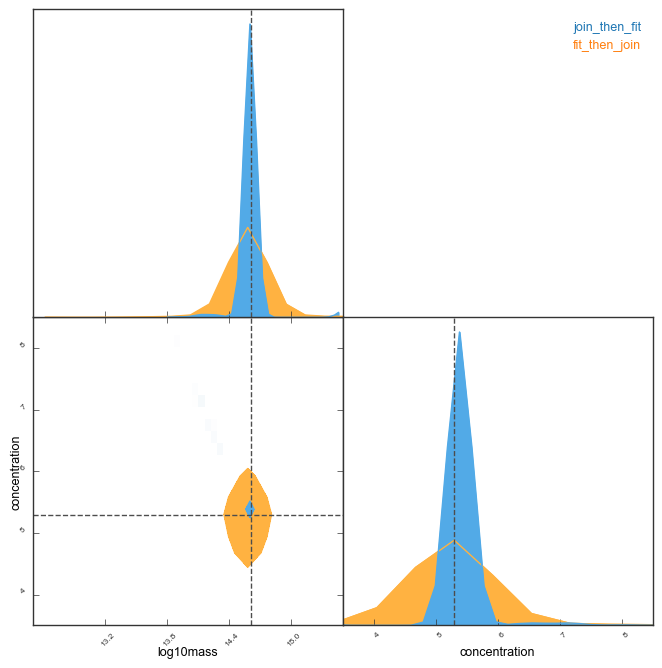

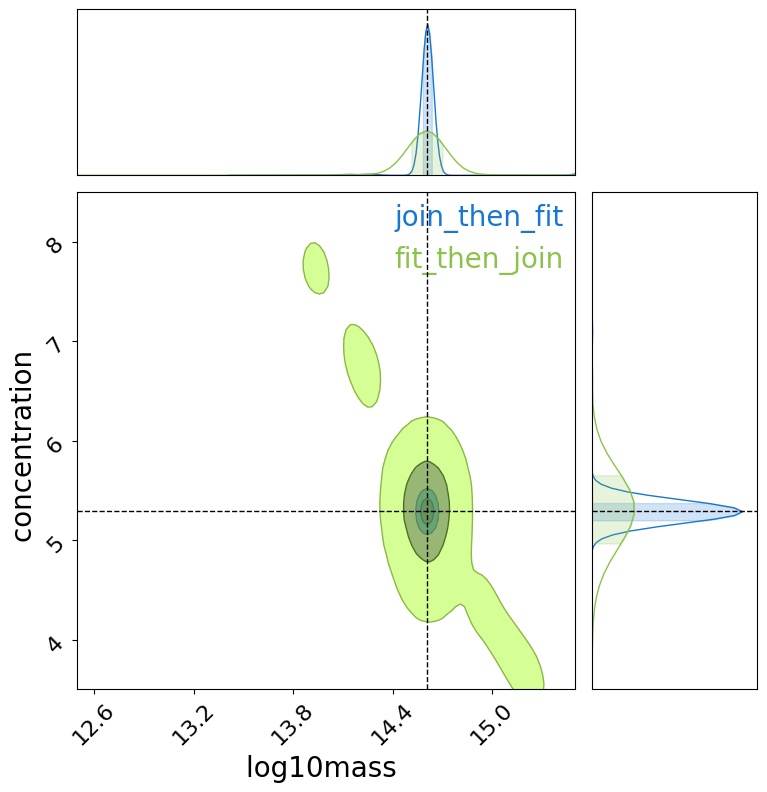

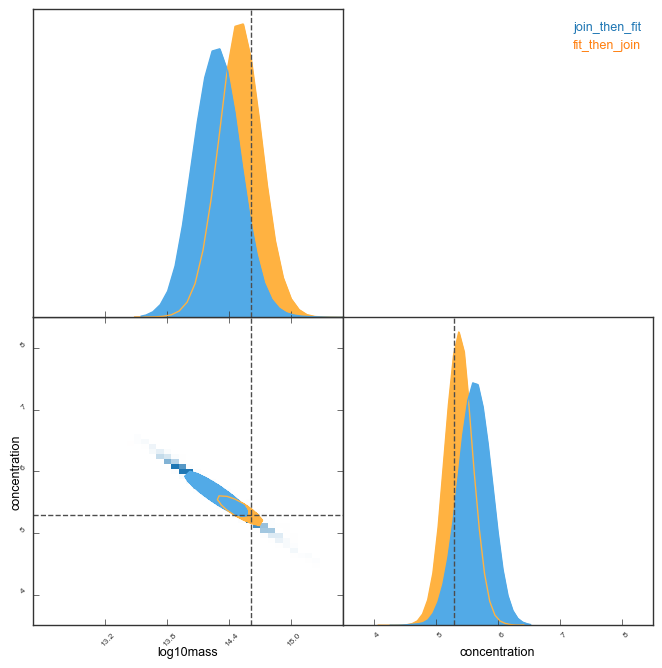

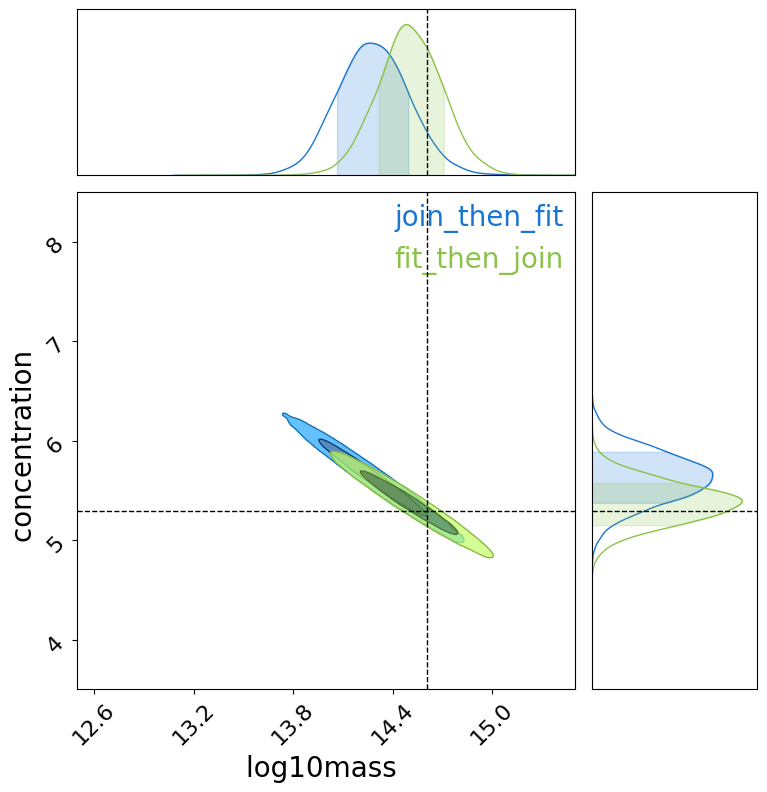

In [114]:
%run plot_example.py --config_dir example